## Import

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings


## Data preparation

In [27]:
clean_df = pd.read_csv('../data/processed/video_data_processed.csv')

In [28]:
clean_df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year
4457,ry9z4NpltEU,Data Science Dojo,Data Science Dojo Alumni - Victoria Butsky,"As a recent graduate, Victoria Butsky wanted t...",Data Science Bootcamp|5-Days|Data Science Dojo...,2017-02-08 00:26:48+00:00,261,2,0,103,hd,True,0,8,2,2,2017
27954,iMaEACUVr4w,Databricks,Hyperspace: An Indexing Subsystem for Apache S...,"At Microsoft, we store datasets (both from int...",Databricks|Hyperspace|Indexing Subsystem|Apach...,2020-12-11 16:40:16+00:00,3279,33,1,1935,hd,True,16,11,4,12,2020
8616,oGy5eLXO4Hw,Data Nash,6 Regrets From My First Year As A Data Scientist,Connect with me on Instagram : https://www.ins...,data science|data analytics|data science job|d...,2023-05-06 08:36:15+00:00,16636,891,69,920,hd,False,8,6,5,5,2023
44955,Mm4TGlkns8A,Tableau Tim,Tableau Prep Builder: The Interface and philos...,"In this video, I give you a tour around the Ta...",business intelligence|tableau prep join|tablea...,2020-01-27 21:11:06+00:00,6213,96,6,954,hd,False,21,27,0,1,2020
11413,IAWaK9QEcy4,Analytics Vidhya,NFTs - Friend or FOMO? | DataHour by Ishaan Bh...,Breakdown of bitcoin is a very primitive webin...,what is the blockchain and how it works|how it...,2022-12-02 12:30:05+00:00,80,2,0,2802,hd,False,12,2,4,12,2022


## Feature engineering

Create a `isTrending` column based on our criteria for the viewCount values, where labels 'low', 'medium', 'high' are assigned based on the mean value.


Noted: We assume that low: 0, medium: 1, high: 2

In [29]:
X = clean_df[['likeCount', 'commentCount', 'hour', 'day', 'month', 'year']]
mean_engagement = clean_df['viewCount'].mean()
# assign labels based on the engagement
clean_df['isTrending'] = pd.cut(clean_df['viewCount'], 
                               bins=[float('-inf'), mean_engagement, mean_engagement *10, float('inf')], 
                               labels=False)
y = clean_df['isTrending']

In [30]:
clean_df.sample(5)


,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year,isTrending
21396,EAIrdMMHEHs,Applied AI Course,Scholarship test for GATE CSE 2020 aspirants f...,"for more details,\r\nPlease visit https://gate...",Data Science|Machine Learning|Deep Learning|NL...,2019-05-19 12:04:04+00:00,2348,58,6,410,hd,False,12,19,6,5,2019,0
17705,7R3ol9a46yQ,Guy in a Cube,Use other tools with the Power BI data model,Patrick looks at other tools you can use again...,power bi dashboard|power bi desktop|power bi d...,2019-09-18 15:00:04+00:00,11762,348,51,697,hd,False,15,18,2,9,2019,0
9803,JKgMACmmbsM,Andreas Kretz,AWS or Azure What's best for beginners?,AWS or Azure What's best for beginners?\r\nC...,"""AWS or Azure Whats best for beginners?""|pytho...",2021-07-19 15:00:09+00:00,1408,27,1,135,hd,False,15,19,0,7,2021,0
34861,ZXEb9QZS6a0,Trouble- Free,15. System Of Linear Equations - Important poi...,Abroad Education Channel :\r\nhttps://www.yout...,m1|matricesm1|jntuhm1,2022-04-26 10:21:18+00:00,692,18,0,595,hd,False,10,26,1,4,2022,0
31442,mtyN2kdSy9M,DataTrained,Expectations from Learners - DataTrained Free ...,Welcome to the DataTrained Cost Free Digital M...,(notag),2021-01-31 11:07:54+00:00,371,11,5,34,hd,False,11,31,6,1,2021,0


In [31]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y ,test_size=0.3, random_state= 2023,stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp ,test_size=0.5, random_state= 2023,stratify=y_tmp)

# Baseline Model Comparison


In [32]:
from sklearn.svm import LinearSVC , SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

seed = 2023
models = [
    LinearSVC(random_state=seed, dual=False, max_iter=1000),
    SVC(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

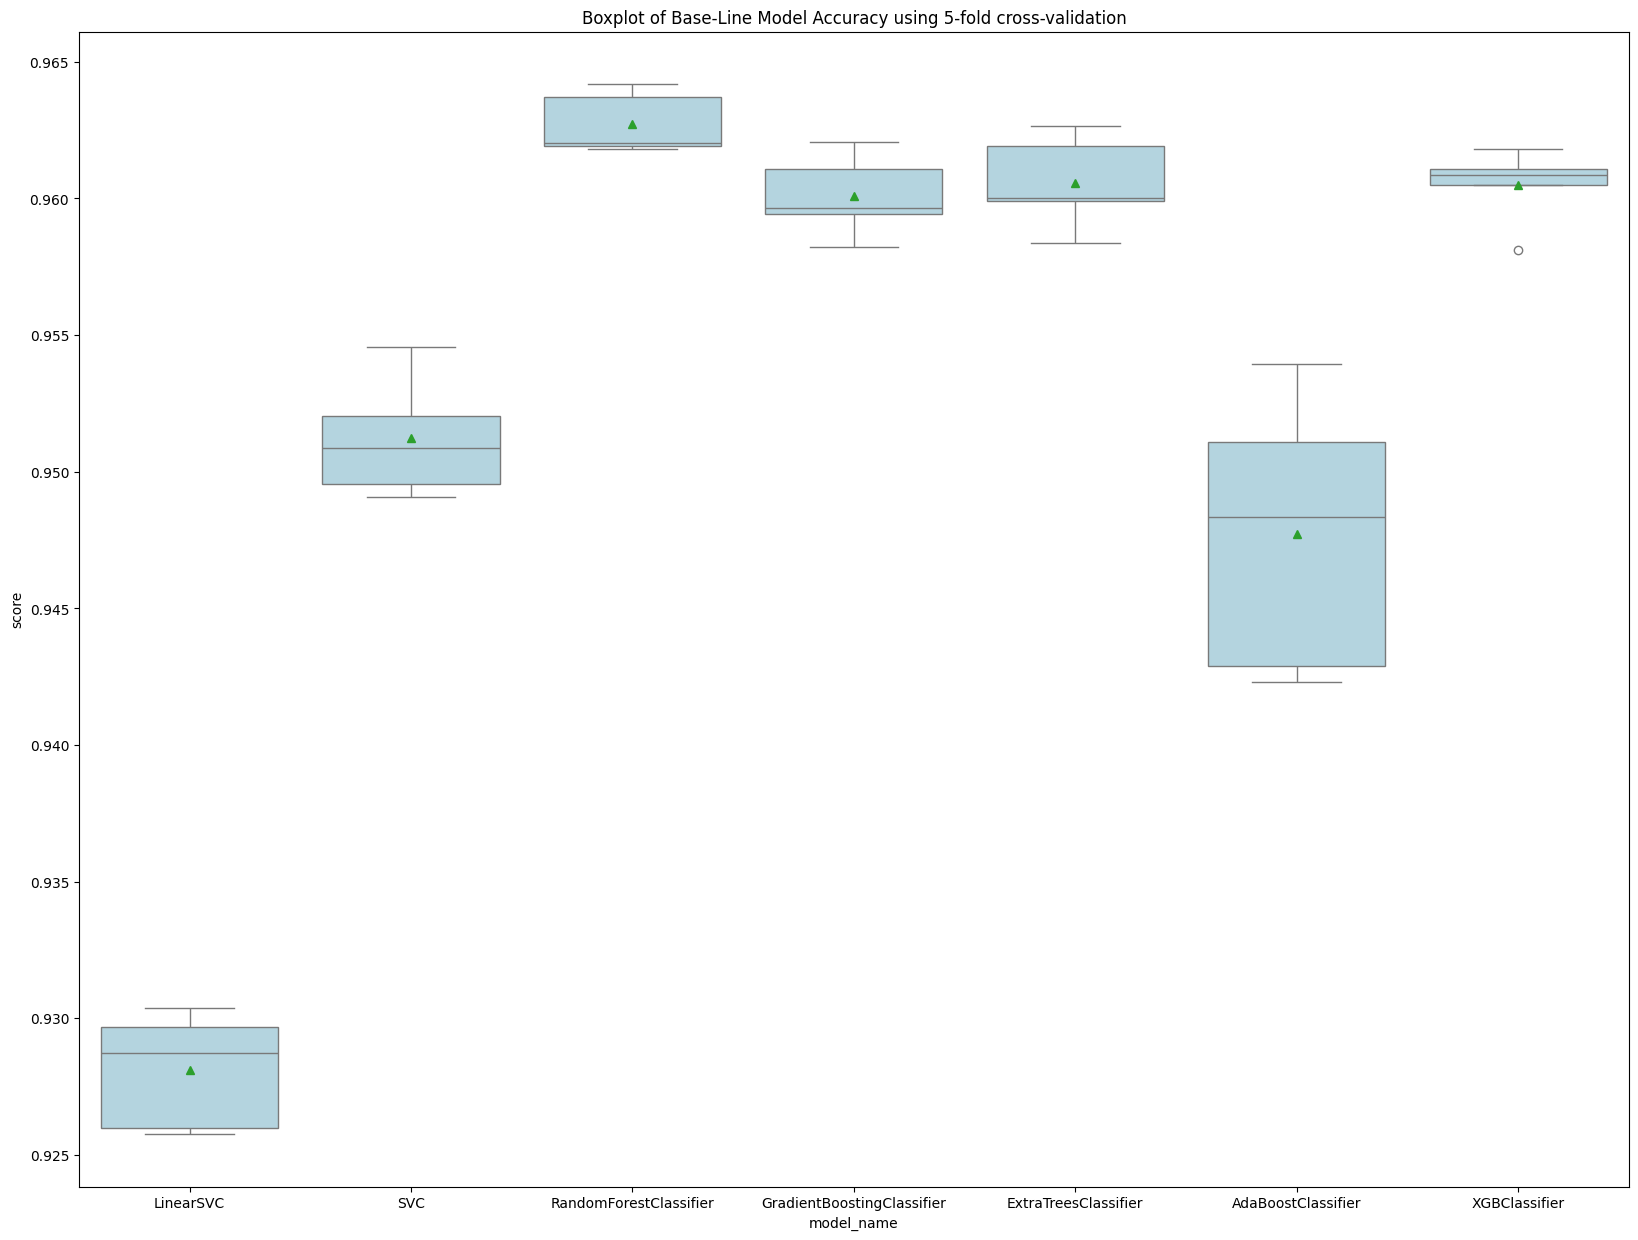

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.962734,0.001124
ExtraTreesClassifier,0.960568,0.001715
XGBClassifier,0.960473,0.001402
GradientBoostingClassifier,0.960092,0.001491
SVC,0.951216,0.002198
AdaBoostClassifier,0.947718,0.005087
LinearSVC,0.928109,0.002127


In [33]:
def generate_baseline_result(models, X, y, metrics, cv=5, plot_result=False):
    # define k-fold
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'score'])
    
    mean = cv_df.groupby('model_name')['score'].mean()
    std = cv_df.groupby('model_name')['score'].std()
    
    baseline_results = pd.concat([mean,std],axis =1, ignore_index=True)
    baseline_results.columns =['Mean','Standard Deviation']
    baseline_results.sort_values(by=['Mean'], ascending = False, inplace = True)
    
    if plot_result:
        plt.figure(figsize=(20, 15))
        sns.boxplot(x ='model_name',y = 'score', data = cv_df, color ='lightblue',showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.show()
    
    return baseline_results

generate_baseline_result(models, X_train, y_train, metrics='accuracy',cv=5,plot_result =True )

# Fine-tune 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=2023),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_valid, y_valid)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

best_params

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

# Re-train on train + valid set

In [36]:
final_model_train_valid = RandomForestClassifier(random_state=2023, **best_params)

X_train_valid = pd.concat([X_train, X_valid], axis=0)
y_train_valid = pd.concat([y_train, y_valid], axis=0)
final_model_train_valid.fit(X_train_valid, y_train_valid)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=2023)

# Test on test set 

In [37]:
y_pred_final_train_valid = final_model_train_valid.predict(X_test)
accuracy_final_train_valid = accuracy_score(y_test, y_pred_final_train_valid)
print(f"Accuracy of the Final Model on Test Set: {accuracy_final_train_valid}")

Accuracy of the Final Model on Test Set: 0.9656857301499168


# Visualize

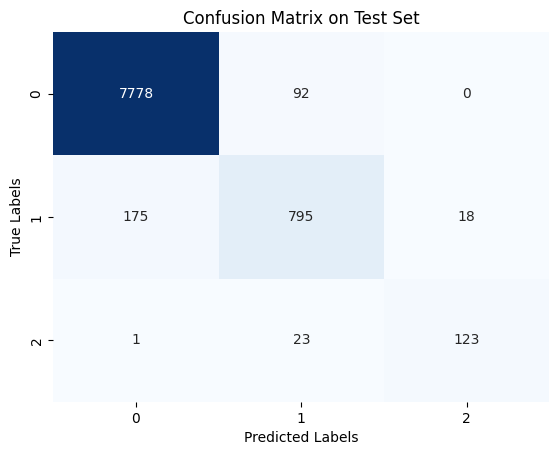

In [38]:
cm = confusion_matrix(y_test, y_pred_final_train_valid)

# Biểu đồ heatmap cho confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Test Set')
plt.show()

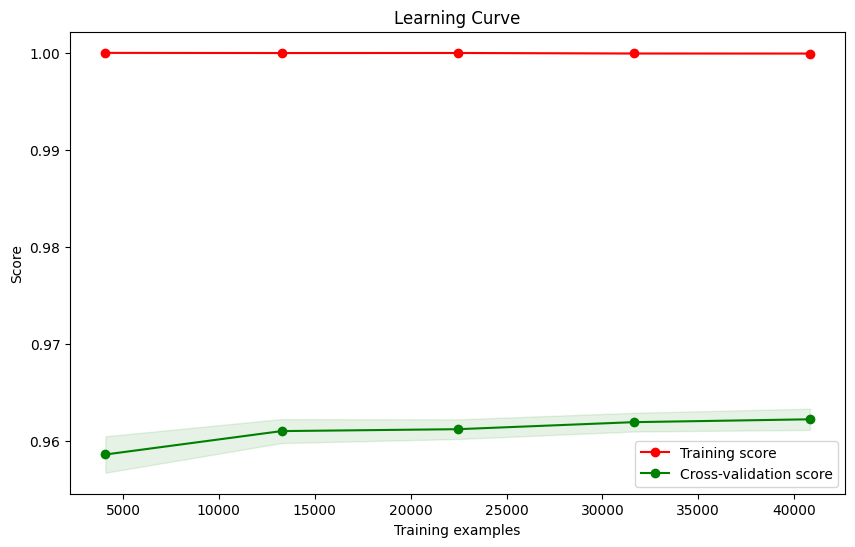

In [39]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(accuracy_score)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1, color="g"
    )

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Định nghĩa mô hình và các thông số cần thiết
model = RandomForestClassifier(random_state=2023, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

# Vẽ đường học tập
plot_learning_curve(model, "Learning Curve", X_train_valid, y_train_valid, cv=cv, n_jobs=-1)
plt.show()